Copyright (c) 2022, Hikmet Güner
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

<h1>Imports</h1>

In [973]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist


<h2>Reading and Analyzing Data</h2>

In [974]:
df = pd.read_csv("exoplanets.csv",header=0, index_col=0)
df.head(10)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14
5,14 And b,14 And,0,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-07-23,2011-08,2014-07-23
6,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
7,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2021-09-20,2021-05,2021-09-20
8,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-04-25,2003-01,2014-08-21
9,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-04-25,2008-04,2014-08-21


<h2>Checking Null Values</h2>

Calculating total amount of null values for insight, preparing for what's to come.

In [975]:
total_null_values = df.isnull().sum().sum()
total_null_values

916679

Dealing with rows with many missing data

In [976]:
def get_empty_col(row_index):
    total_nan = 0
    for col in df.columns:
        if pd.isna(df[col][row_index]):
            total_nan += 1
    return total_nan

Finding duplicate entries

In [977]:
df['empty_col_count'] = 0
for i in df.index:
    df['empty_col_count'][i] = get_empty_col(i)
df.head(10)

C:\Users\Hikmet\AppData\Local\Temp\ipykernel_13328\3730151239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['empty_col_count'][i] = get_empty_col(i)


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,empty_col_count
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14,16
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23,42
2,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23,42
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06,19
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14,16
5,14 And b,14 And,0,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-07-23,2011-08,2014-07-23,42
6,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14,24
7,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2021-09-20,2021-05,2021-09-20,17
8,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-04-25,2003-01,2014-08-21,38
9,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-04-25,2008-04,2014-08-21,27


Finding how much column is missing from each row

In [978]:
df = df.sort_values(['rowupdate','empty_col_count'], ascending=[True,True]).drop_duplicates('pl_name').sort_index()

Checking how it compares to the amount of rows 

In [979]:
print(df['empty_col_count'].max())
print(df['empty_col_count'].min())
print(len(df.columns))

70
0
93


Dropping rows missing over %50 columns

In [980]:
print(len(df.index))
df = df[df['empty_col_count'] < 50]
len(df.index)

5044


4924

Iterating over columns to find the ratio of null values to total values.
If the ratio is greater than 0.7, the column will be dropped.

In [981]:
drop_columns = []
for name, val in df.items():
    na_ratio =  val.isnull().sum() / len(val)
    if(na_ratio > 0.7):
        print(f"{name:<16} {na_ratio*100:.3f}%")
        drop_columns.append(name)

pl_radj          75.934%
pl_radjerr1      78.128%
pl_radjerr2      78.128%
pl_radjlim       75.934%
pl_orbeccenerr1  78.128%
pl_orbeccenerr2  78.128%
pl_insol         86.413%
pl_insolerr1     87.246%
pl_insolerr2     87.246%
pl_eqterr1       84.789%
pl_eqterr2       84.789%
st_spectype      78.859%


Adding the columns that are not useful for the model to the drop columns list

In [982]:
drop_columns.extend([
    'default_flag',
    'discoverymethod',
    'disc_year',
    'disc_facility',
    'soltype',
    'pl_controv_flag',
    'pl_refname',
    'sy_refname',
    'st_refname',
    'rastr',
    'ra',
    'decstr',
    'dec',
    'st_metratio',
    'pl_pubdate',
    'releasedate',
    'pl_bmassprov',
    'pl_bmasselim',
    'pl_bmassjlim',
    'pl_orbperlim',
    'pl_orbsmaxlim',
    'pl_radelim',
    'pl_orbeccenlim',
    'pl_insollim',
    'pl_eqtlim',
    'st_tefflim',
    'st_radlim',
    'st_masslim',
    'st_metlim',
    'st_metratio',
    'st_logglim',
    'pl_bmasseerr2',
    'pl_bmassjerr2'
    'pl_orbsmaxerr2',
    'st_tefferr2',
    'st_raderr2',
    'st_masserr2',
    'st_meterr2',
    'st_loggerr2',
    'sy_vmagerr2',
    'sy_kmagerr2',
    'sy_gaiamagerr2',
    'pl_radeerr2',
    'pl_orbpererr2',
    'pl_insolerr2',
    'sy_disterr2'
    ])


Dropping columns that are related to the parent star, the data could be used for another analysis on how to detect stars that might have habitable planets within their systems.

In [983]:
index = 0
for columns in drop_columns:
    if index % 3 == 0:
        print()
    print(f'{columns:<20}', end='')
    index += 1


pl_radj             pl_radjerr1         pl_radjerr2         
pl_radjlim          pl_orbeccenerr1     pl_orbeccenerr2     
pl_insol            pl_insolerr1        pl_insolerr2        
pl_eqterr1          pl_eqterr2          st_spectype         
default_flag        discoverymethod     disc_year           
disc_facility       soltype             pl_controv_flag     
pl_refname          sy_refname          st_refname          
rastr               ra                  decstr              
dec                 st_metratio         pl_pubdate          
releasedate         pl_bmassprov        pl_bmasselim        
pl_bmassjlim        pl_orbperlim        pl_orbsmaxlim       
pl_radelim          pl_orbeccenlim      pl_insollim         
pl_eqtlim           st_tefflim          st_radlim           
st_masslim          st_metlim           st_metratio         
st_logglim          pl_bmasseerr2       pl_orbsmaxerr2      
st_tefferr2         st_raderr2          st_masserr2         
st_meterr2          st_

Dropping columns from the dataset

In [984]:
df = df.drop(columns=drop_columns)
df.head(10)

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbsmax,pl_orbsmaxerr1,pl_rade,pl_radeerr1,...,sy_dist,sy_disterr1,sy_vmag,sy_vmagerr1,sy_kmag,sy_kmagerr1,sy_gaiamag,sy_gaiamagerr1,rowupdate,empty_col_count
0,11 Com b,11 Com,2,1,326.0300,0.3200,1.290,0.050,NaN,NaN,...,93.1846,1.92380,4.72307,0.023,2.282,0.346,4.44038,0.003848,2014-05-14,16
4,11 UMi b,11 UMi,1,1,516.2200,3.2500,1.540,0.070,NaN,NaN,...,125.3210,1.97650,5.01300,0.005,1.939,0.270,4.56216,0.003903,2018-04-25,16
6,14 And b,14 And,1,1,185.8400,0.2300,0.830,NaN,NaN,NaN,...,75.4392,0.71400,5.23133,0.023,2.331,0.240,4.91781,0.002826,2014-05-14,24
13,14 Her b,14 Her,1,2,1796.4000,8.3000,2.800,NaN,NaN,NaN,...,17.9323,0.00730,6.61935,0.023,4.714,0.016,6.38300,0.000351,2018-04-25,25
19,16 Cyg B b,16 Cyg B,3,1,799.5000,0.6000,1.680,0.030,NaN,NaN,...,21.1397,0.01100,6.21500,0.016,4.651,0.016,6.06428,0.000603,2018-04-25,17
20,17 Sco b,17 Sco,1,1,578.3800,2.0100,1.450,0.020,NaN,NaN,...,124.9530,2.59000,5.22606,0.023,2.094,0.244,4.75429,0.005055,2021-10-25,16
21,18 Del b,18 Del,2,1,993.3000,3.2000,2.600,NaN,NaN,NaN,...,76.2220,0.62170,5.51048,0.023,3.366,0.204,5.27476,0.002654,2014-05-14,26
26,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,NaN,NaN,330.000,NaN,18.647,NaN,...,139.1350,1.33200,12.61800,0.069,8.916,0.021,12.05720,0.002275,2014-05-14,29
27,24 Boo b,24 Boo,1,1,30.3506,0.0078,0.190,0.012,NaN,NaN,...,95.9863,0.63685,5.59000,0.001,3.159,0.280,5.33390,0.002000,2018-04-25,16
28,24 Sex b,24 Sex,1,2,452.8000,2.1000,1.333,0.004,NaN,NaN,...,72.0691,0.68540,6.45350,0.023,4.285,0.016,6.20374,0.000498,2014-05-14,17


In [985]:
null_after_dropcol = df.isnull().sum().sum()
null_after_dropcol

35596

Function for finding amount of missing columns for a row

In [986]:
df.head(10)

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbsmax,pl_orbsmaxerr1,pl_rade,pl_radeerr1,...,sy_dist,sy_disterr1,sy_vmag,sy_vmagerr1,sy_kmag,sy_kmagerr1,sy_gaiamag,sy_gaiamagerr1,rowupdate,empty_col_count
0,11 Com b,11 Com,2,1,326.0300,0.3200,1.290,0.050,NaN,NaN,...,93.1846,1.92380,4.72307,0.023,2.282,0.346,4.44038,0.003848,2014-05-14,16
4,11 UMi b,11 UMi,1,1,516.2200,3.2500,1.540,0.070,NaN,NaN,...,125.3210,1.97650,5.01300,0.005,1.939,0.270,4.56216,0.003903,2018-04-25,16
6,14 And b,14 And,1,1,185.8400,0.2300,0.830,NaN,NaN,NaN,...,75.4392,0.71400,5.23133,0.023,2.331,0.240,4.91781,0.002826,2014-05-14,24
13,14 Her b,14 Her,1,2,1796.4000,8.3000,2.800,NaN,NaN,NaN,...,17.9323,0.00730,6.61935,0.023,4.714,0.016,6.38300,0.000351,2018-04-25,25
19,16 Cyg B b,16 Cyg B,3,1,799.5000,0.6000,1.680,0.030,NaN,NaN,...,21.1397,0.01100,6.21500,0.016,4.651,0.016,6.06428,0.000603,2018-04-25,17
20,17 Sco b,17 Sco,1,1,578.3800,2.0100,1.450,0.020,NaN,NaN,...,124.9530,2.59000,5.22606,0.023,2.094,0.244,4.75429,0.005055,2021-10-25,16
21,18 Del b,18 Del,2,1,993.3000,3.2000,2.600,NaN,NaN,NaN,...,76.2220,0.62170,5.51048,0.023,3.366,0.204,5.27476,0.002654,2014-05-14,26
26,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,NaN,NaN,330.000,NaN,18.647,NaN,...,139.1350,1.33200,12.61800,0.069,8.916,0.021,12.05720,0.002275,2014-05-14,29
27,24 Boo b,24 Boo,1,1,30.3506,0.0078,0.190,0.012,NaN,NaN,...,95.9863,0.63685,5.59000,0.001,3.159,0.280,5.33390,0.002000,2018-04-25,16
28,24 Sex b,24 Sex,1,2,452.8000,2.1000,1.333,0.004,NaN,NaN,...,72.0691,0.68540,6.45350,0.023,4.285,0.016,6.20374,0.000498,2014-05-14,17


<h1>Filling Empty Columns</h1>

Checking for empty columns that miss under %30 of data

In [987]:
for name, val in df.items():
    na_ratio =  val.isnull().sum() / len(val)
    if na_ratio < 0.3 and na_ratio != 0:
        print(f"{name:<16} {na_ratio*100:.3f}%")

pl_orbper        1.361%
pl_orbpererr1    5.666%
pl_orbsmax       10.317%
pl_rade          22.177%
pl_radeerr1      25.264%
pl_orbeccen      15.211%
st_teff          4.712%
st_tefferr1      9.139%
st_rad           7.799%
st_raderr1       12.449%
st_mass          5.321%
st_masserr1      10.012%
st_logg          11.231%
st_loggerr1      13.729%
sy_dist          2.153%
sy_disterr1      4.143%
sy_vmag          0.711%
sy_vmagerr1      0.772%
sy_kmag          0.792%
sy_kmagerr1      1.361%
sy_gaiamag       1.543%
sy_gaiamagerr1   1.543%


Checking for empty columns that miss over %30 of data

In [988]:
for name, val in df.items():
    na_ratio =  val.isnull().sum() / len(val)
    if na_ratio > 0.3:
        print(f"{name:<16} {na_ratio*100:.3f}%")

pl_orbsmaxerr1   67.141%
pl_bmasse        65.760%
pl_bmasseerr1    68.745%
pl_bmassj        65.760%
pl_bmassjerr1    68.745%
pl_bmassjerr2    68.745%
pl_eqt           30.260%
st_met           58.895%
st_meterr1       61.454%


<h3>There seems to be a lot of missing data, however, KNNImputer will be utilized to fill the empty columns.</h3>

Before scaling, check if each data is suitable for scaling

In [989]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4924 entries, 0 to 32551
Columns: 38 entries, pl_name to empty_col_count
dtypes: float64(31), int64(4), object(3)
memory usage: 1.5+ MB


In [990]:
object_col = df.select_dtypes(object)
object_col.value_counts()

pl_name       hostname    rowupdate 
11 Com b      11 Com      2014-05-14    1
Kepler-298 c  Kepler-298  2013-10-28    1
Kepler-30 c   Kepler-30   2013-10-28    1
Kepler-30 b   Kepler-30   2013-10-28    1
Kepler-299 e  Kepler-299  2013-10-28    1
                                       ..
KELT-21 b     KELT-21     2018-02-01    1
KELT-20 b     KELT-20     2018-08-14    1
KELT-2 A b    KELT-2 A    2018-04-25    1
KELT-19 A b   KELT-19 A   2018-01-08    1
xi Aql b      xi Aql      2014-05-14    1
Length: 4924, dtype: int64

In [991]:
label_df = df[['pl_name','hostname']]
df = df.drop(['pl_name','hostname','rowupdate','empty_col_count'], axis=1)
label_df.head()

,pl_name,hostname
0,11 Com b,11 Com
4,11 UMi b,11 UMi
6,14 And b,14 And
13,14 Her b,14 Her
19,16 Cyg B b,16 Cyg B


First, the data will be scaled for further use

In [992]:
scaler = MinMaxScaler()
df.apply(np.abs)
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)
df.head(10)

,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbsmax,pl_orbsmaxerr1,pl_rade,pl_radeerr1,pl_bmasse,pl_bmasseerr1,...,st_logg,st_loggerr1,sy_dist,sy_disterr1,sy_vmag,sy_vmagerr1,sy_kmag,sy_kmagerr1,sy_gaiamag,sy_gaiamagerr1
0,0.333333,0.000000,8.105728e-07,6.808511e-10,0.000171,9.606148e-06,NaN,NaN,0.646624,0.017899,...,0.177419,0.050,0.010443,0.000517,0.094509,0.006569,0.169975,0.033554,0.087725,0.059038
4,0.000000,0.000000,1.283682e-06,6.914894e-09,0.000204,1.344861e-05,NaN,NaN,0.349965,0.029476,...,0.073314,0.075,0.014095,0.000531,0.101625,0.001194,0.159029,0.025942,0.094780,0.059919
6,0.000000,0.000000,4.618415e-07,4.893617e-10,0.000110,NaN,NaN,NaN,0.159966,NaN,...,0.224340,0.035,0.008426,0.000192,0.106983,0.006569,0.171539,0.022937,0.115386,0.042849
13,0.000000,0.142857,4.468210e-06,1.765957e-08,0.000372,NaN,NaN,NaN,0.157968,0.000714,...,0.483871,0.075,0.001890,0.000002,0.141046,0.006569,0.247590,0.000501,0.200276,0.003632
19,0.666667,0.000000,1.988359e-06,1.276596e-09,0.000223,5.763689e-06,NaN,NaN,0.055969,0.000833,...,0.476540,0.050,0.002255,0.000003,0.131123,0.004479,0.245580,0.000501,0.181810,0.007620
20,0.000000,0.000000,1.438309e-06,4.276596e-09,0.000192,3.842459e-06,NaN,NaN,0.143973,0.001788,...,0.087977,0.020,0.014053,0.000696,0.106853,0.006569,0.163975,0.023337,0.105912,0.078165
21,0.333333,0.000000,2.470448e-06,6.808511e-09,0.000346,NaN,NaN,NaN,0.343298,NaN,...,0.252199,0.030,0.008515,0.000167,0.113833,0.006569,0.204570,0.019331,0.136067,0.040119
26,0.000000,0.000000,NaN,NaN,0.043964,NaN,0.005797,NaN,0.266682,0.047726,...,NaN,NaN,0.015665,0.000358,0.288260,0.020305,0.381694,0.001002,0.529028,0.034115
27,0.000000,0.000000,7.505195e-08,1.659574e-11,0.000025,2.305476e-06,NaN,NaN,0.030304,0.001549,...,0.193548,0.050,0.010761,0.000171,0.115785,0.000000,0.197964,0.026943,0.139493,0.029754
28,0.000000,0.142857,1.125921e-06,4.468085e-09,0.000177,7.684918e-07,NaN,NaN,0.066303,0.003101,...,0.351906,0.050,0.008043,0.000184,0.136976,0.006569,0.233899,0.000501,0.189890,0.005952


Defining method to analyze columns after imputation

In [993]:
def get_col_info(col):
    if('err' in col or 'flag' in col):
        return
    mean = df[col].mean()
    std = df[col].std()
    col_max = df[col].max()
    col_min = df[col].min()
    sem = df[col].sem()
    pdf = stats.norm.pdf(df[col].sort_values(),mean,std)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
    fig.suptitle(f'Distribution of {col}')
    #normalize plot
    axes[0].plot(df[col].sort_values(), pdf)
    axes[0].grid(True, alpha=0.3, linestyle="--")
    #box plot
    axes[1].boxplot(df[col], showfliers=False)
    #text field
    axes[2].text(0.1,0.7,f'mean: {mean:.9f}',   bbox=dict(facecolor='cyan', alpha=0.4))
    axes[2].text(0.1,0.58,f'std: {std:.9f}',    bbox=dict(facecolor='magenta', alpha=0.4))
    axes[2].text(0.1,0.46,f'max: {col_max:.9f}',bbox=dict(facecolor='blue', alpha=0.4))
    axes[2].text(0.1,0.34,f'min: {col_min:.9f}',bbox=dict(facecolor='green', alpha=0.4))
    axes[2].text(0.1,0.22,f'err: {sem:.9f}',    bbox=dict(facecolor='red', alpha=0.6))
    axes[2].set_yticks([])
    axes[2].set_xticks([])
    fig.tight_layout()

Before imputation, notice some bar charts are not available due to NaN values

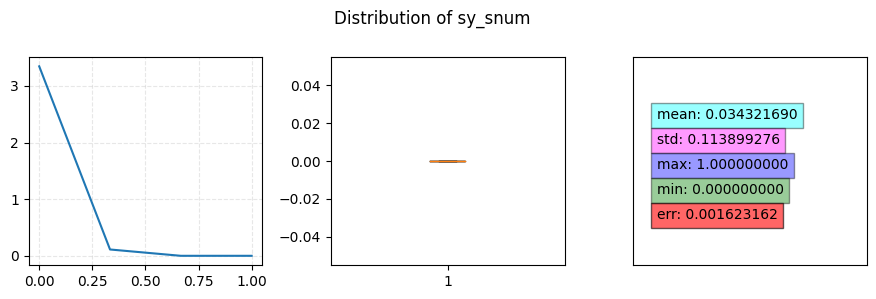

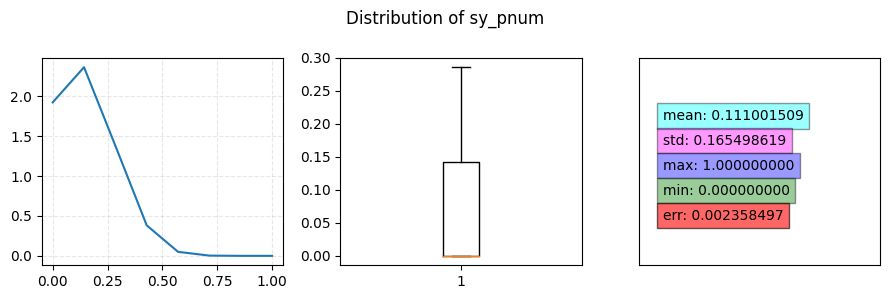

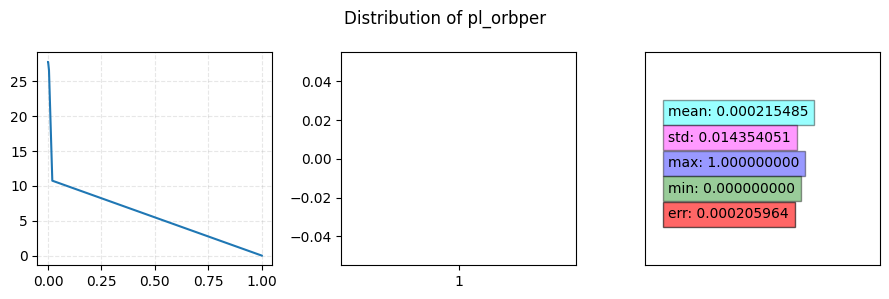

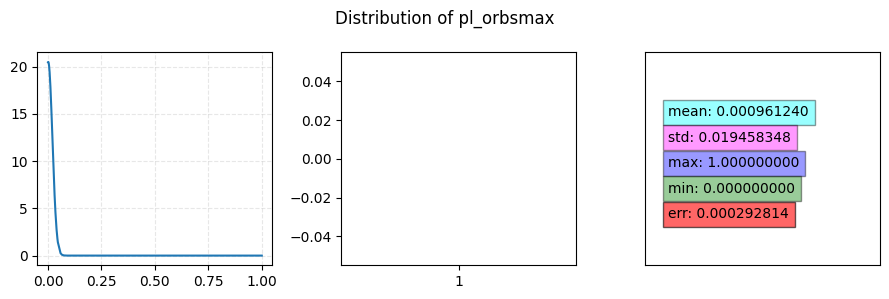

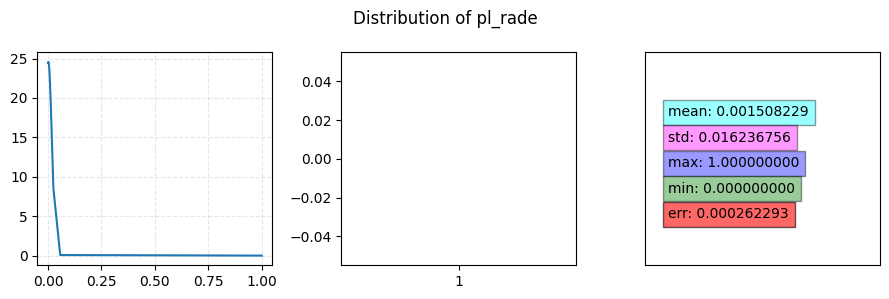

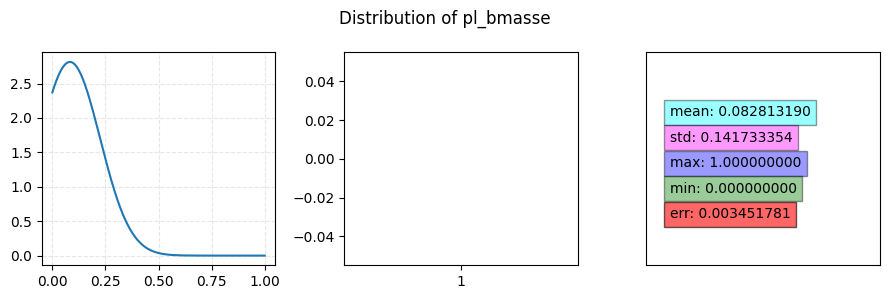

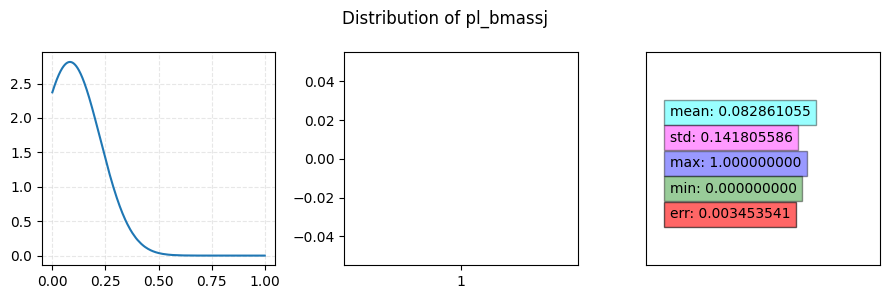

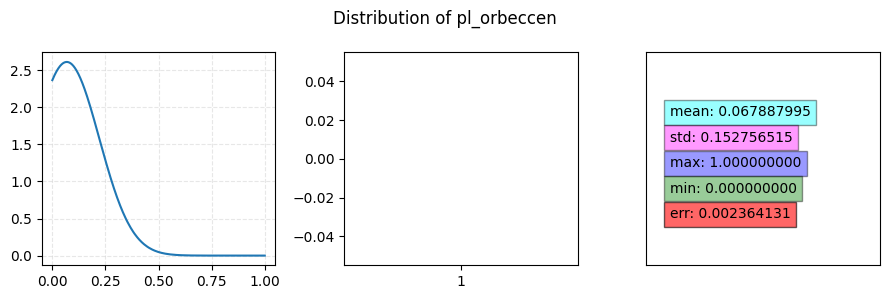

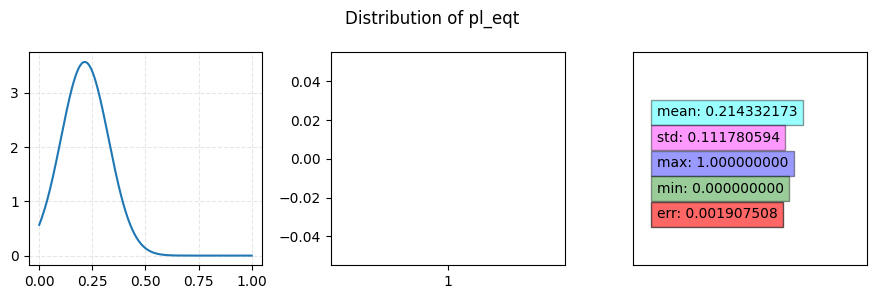

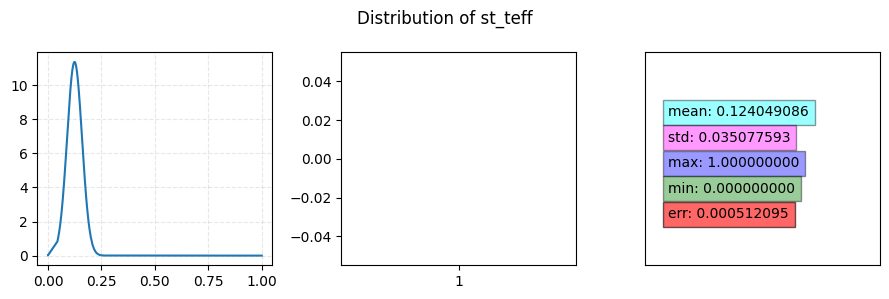

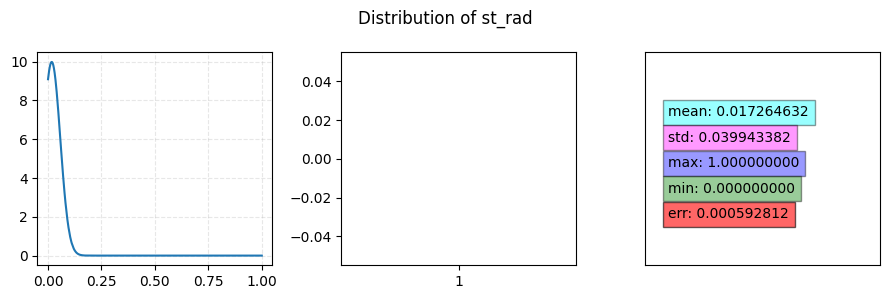

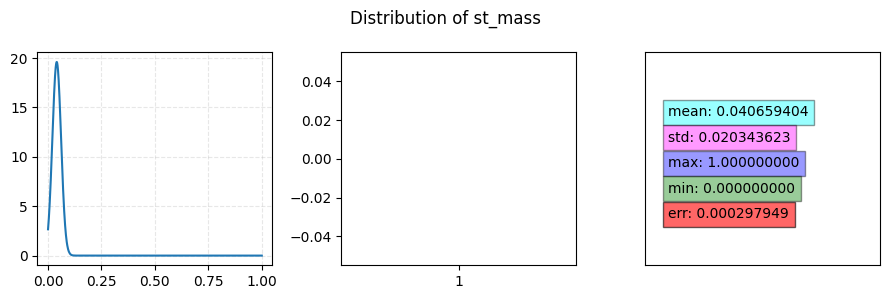

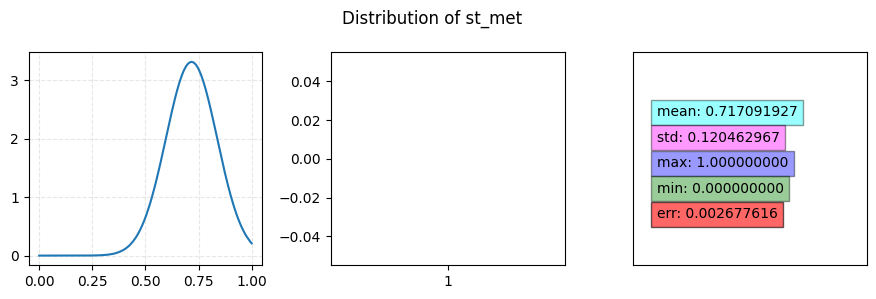

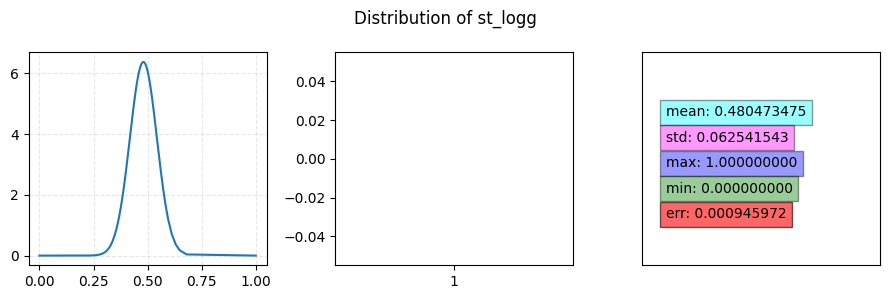

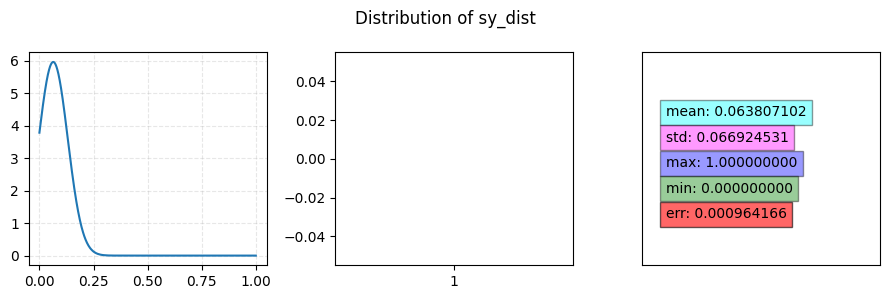

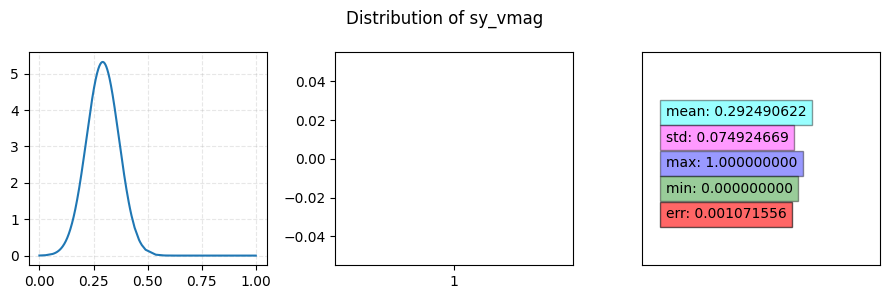

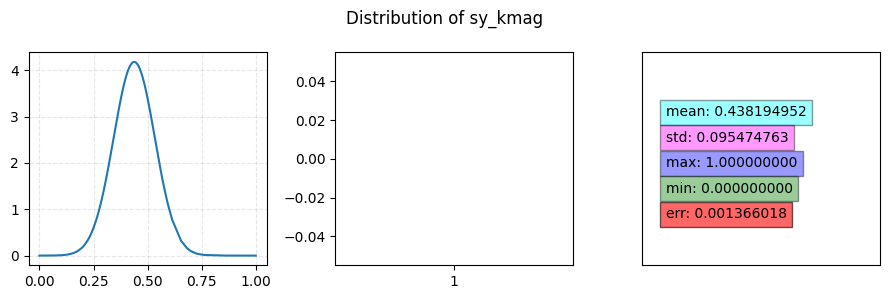

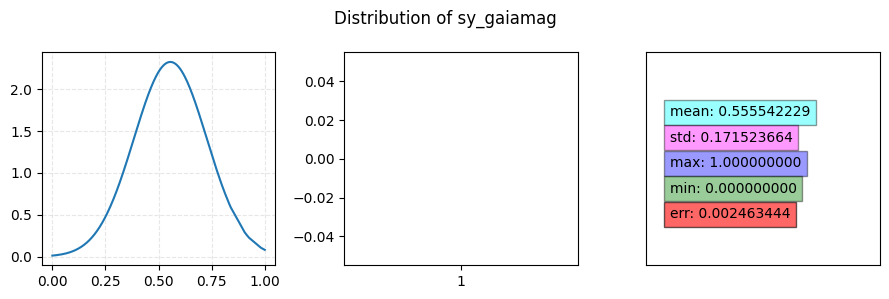

In [994]:
for col in df.columns:
    get_col_info(col)



The imputation, optimal neighbor is said to be root of N, which is K=70

In [995]:
imputer = KNNImputer(n_neighbors=70)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns, index = df.index)

Checking the data after imputation

In [996]:
#df.head(10)

Checking plots after imputation

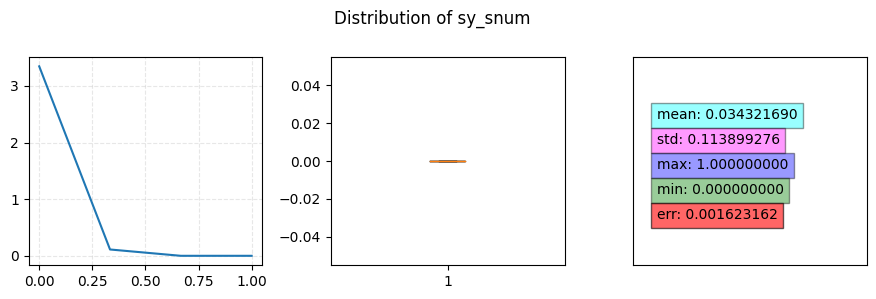

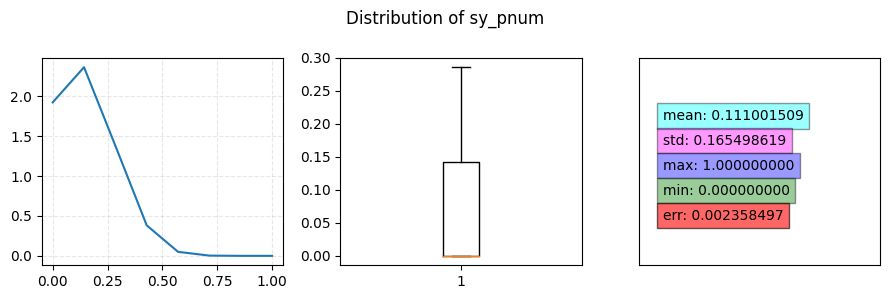

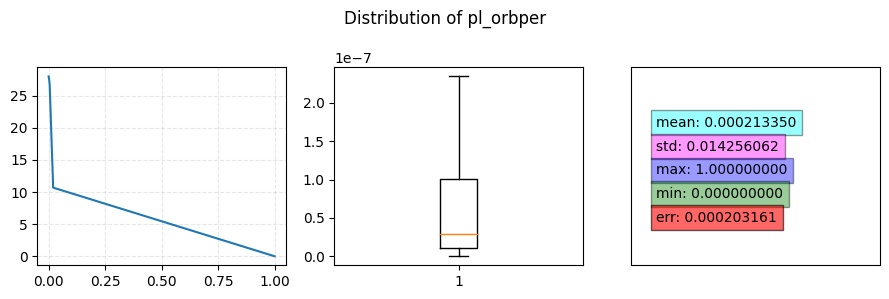

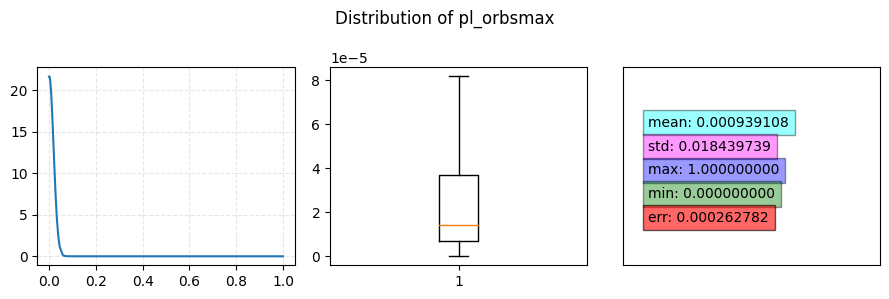

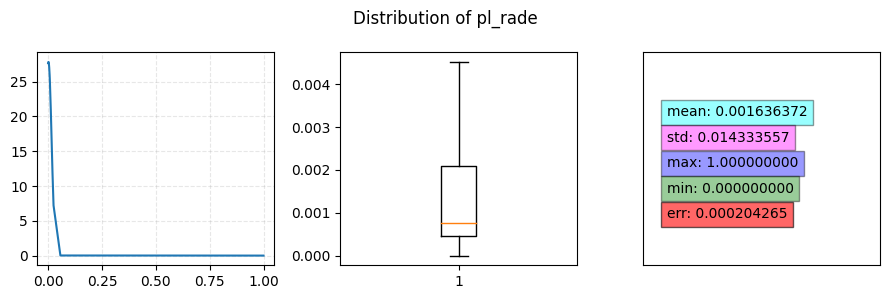

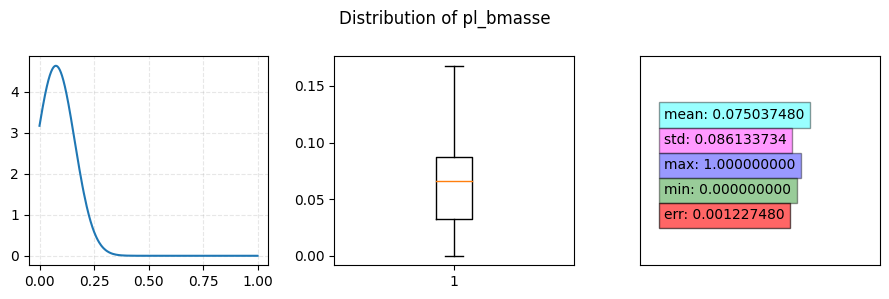

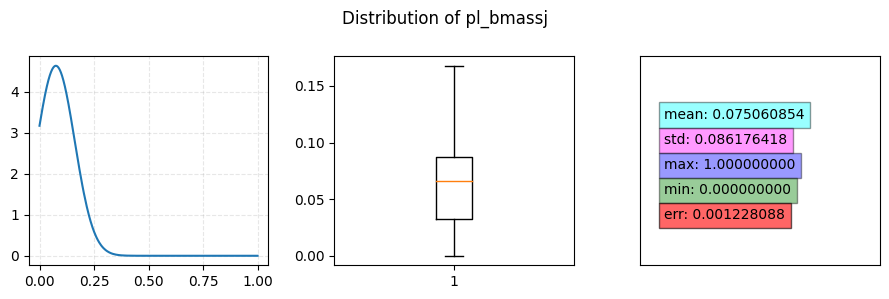

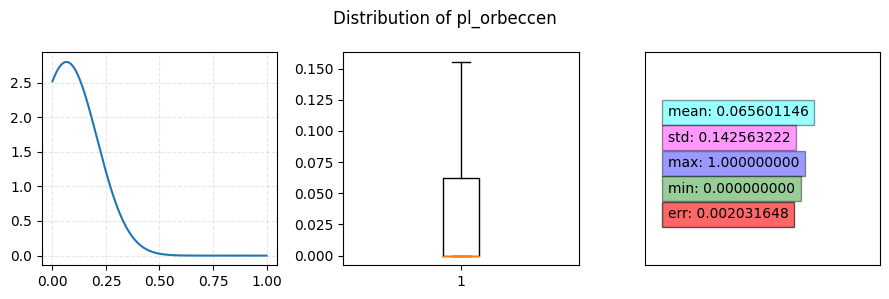

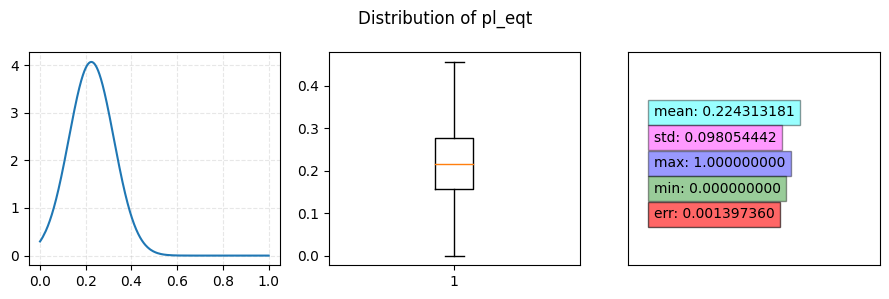

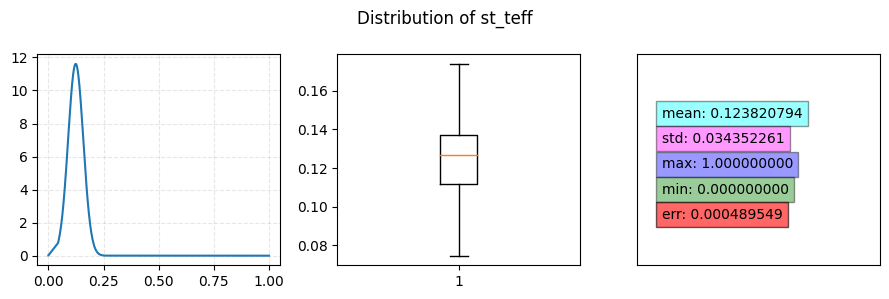

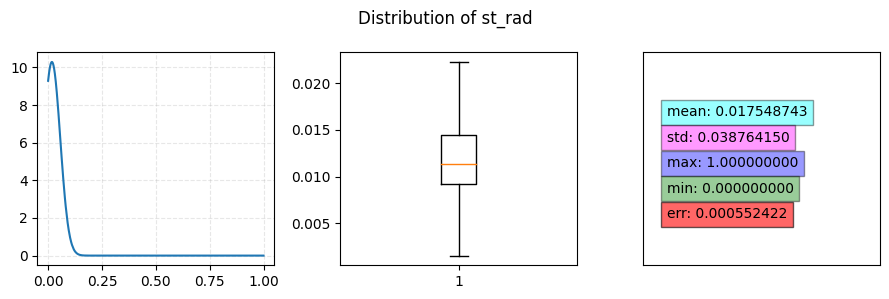

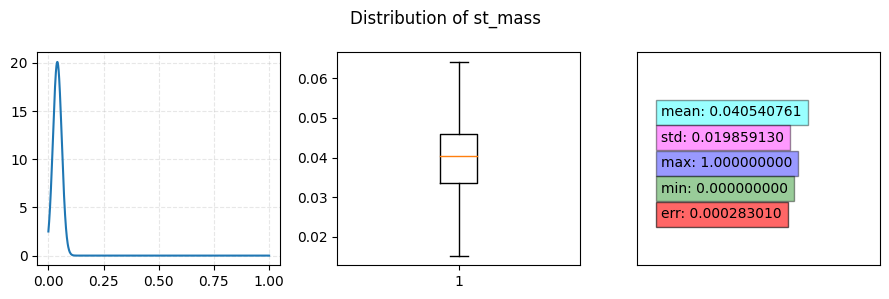

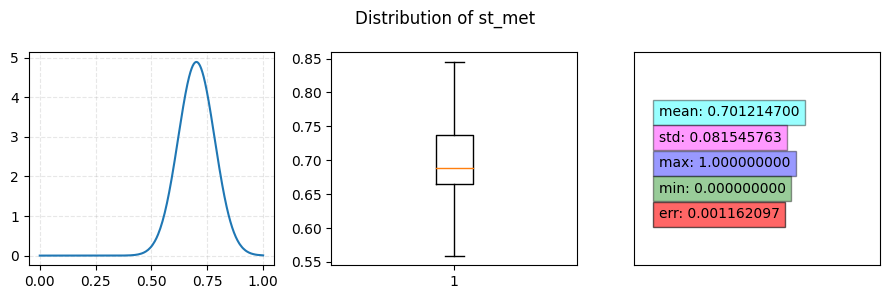

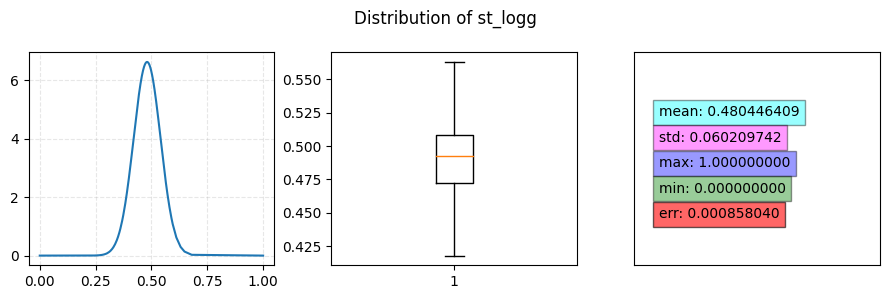

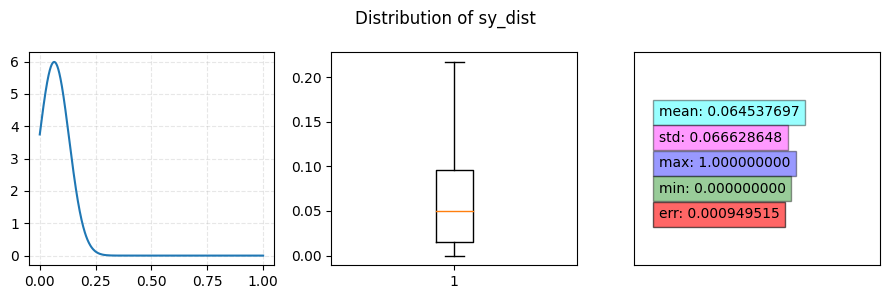

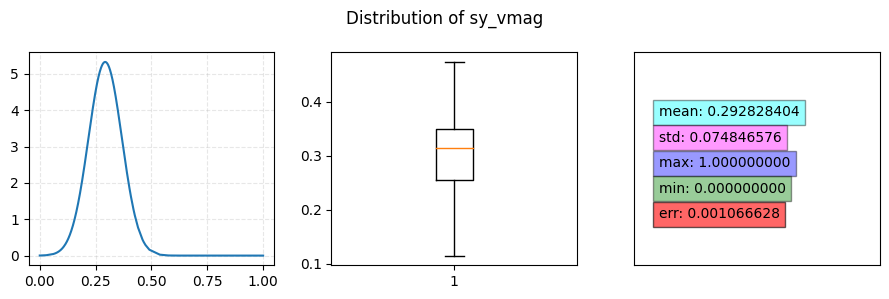

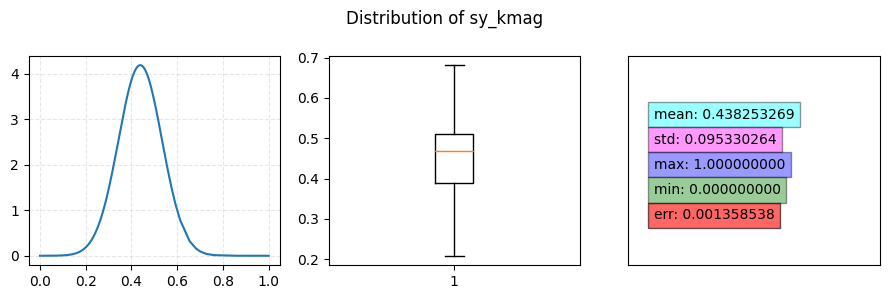

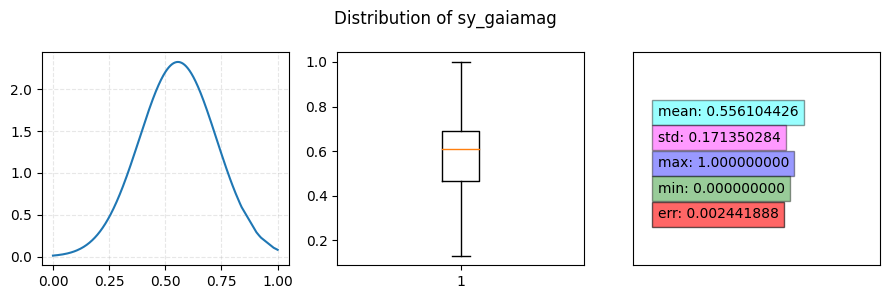

In [997]:
for col in df.columns:
    get_col_info(col)


Checking null values

In [998]:
df.isna().sum()
df.head()


,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbsmax,pl_orbsmaxerr1,pl_rade,pl_radeerr1,pl_bmasse,pl_bmasseerr1,...,st_logg,st_loggerr1,sy_dist,sy_disterr1,sy_vmag,sy_vmagerr1,sy_kmag,sy_kmagerr1,sy_gaiamag,sy_gaiamagerr1
0,0.333333,0.000000,8.105728e-07,6.808511e-10,0.000171,0.000010,0.002156,0.000814,0.646624,0.017899,...,0.177419,0.050,0.010443,0.000517,0.094509,0.006569,0.169975,0.033554,0.087725,0.059038
4,0.000000,0.000000,1.283682e-06,6.914894e-09,0.000204,0.000013,0.003254,0.000900,0.349965,0.029476,...,0.073314,0.075,0.014095,0.000531,0.101625,0.001194,0.159029,0.025942,0.094780,0.059919
6,0.000000,0.000000,4.618415e-07,4.893617e-10,0.000110,0.000022,0.003009,0.000780,0.159966,0.003792,...,0.224340,0.035,0.008426,0.000192,0.106983,0.006569,0.171539,0.022937,0.115386,0.042849
13,0.000000,0.142857,4.468210e-06,1.765957e-08,0.000372,0.000084,0.002496,0.000736,0.157968,0.000714,...,0.483871,0.075,0.001890,0.000002,0.141046,0.006569,0.247590,0.000501,0.200276,0.003632
19,0.666667,0.000000,1.988359e-06,1.276596e-09,0.000223,0.000006,0.003008,0.000526,0.055969,0.000833,...,0.476540,0.050,0.002255,0.000003,0.131123,0.004479,0.245580,0.000501,0.181810,0.007620


Reverse scaling

In [999]:
df = pd.DataFrame(scaler.inverse_transform(df), columns = df.columns, index=df.index)
df.head(10)

,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbsmax,pl_orbsmaxerr1,pl_rade,pl_radeerr1,pl_bmasse,pl_bmasseerr1,...,st_logg,st_loggerr1,sy_dist,sy_disterr1,sy_vmag,sy_vmagerr1,sy_kmag,sy_kmagerr1,sy_gaiamag,sy_gaiamagerr1
0,2.0,1.0,326.030000,0.320000,1.290,0.050000,7.129757,1.000100,6165.60000,476.700000,...,2.310,0.100000,93.1846,1.92380,4.72307,0.023,2.282,0.346,4.44038,0.003848
4,1.0,1.0,516.220000,3.250000,1.540,0.070000,10.601771,1.105943,3337.07000,785.010000,...,1.600,0.150000,125.3210,1.97650,5.01300,0.005,1.939,0.270,4.56216,0.003903
6,1.0,1.0,185.840000,0.230000,0.830,0.116676,9.826943,0.958329,1525.50000,101.045701,...,2.630,0.070000,75.4392,0.71400,5.23133,0.023,2.331,0.240,4.91781,0.002826
13,1.0,2.0,1796.400000,8.300000,2.800,0.435974,8.206629,0.903829,1506.45000,19.070000,...,4.400,0.150000,17.9323,0.00730,6.61935,0.023,4.714,0.016,6.38300,0.000351
19,3.0,1.0,799.500000,0.600000,1.680,0.030000,9.824500,0.645871,533.93000,22.250000,...,4.350,0.100000,21.1397,0.01100,6.21500,0.016,4.651,0.016,6.06428,0.000603
20,1.0,1.0,578.380000,2.010000,1.450,0.020000,11.346600,1.232000,1373.01872,47.674260,...,1.700,0.040000,124.9530,2.59000,5.22606,0.023,2.094,0.244,4.75429,0.005055
21,2.0,1.0,993.300000,3.200000,2.600,0.442245,8.709143,1.042171,3273.50000,214.964388,...,2.820,0.060000,76.2220,0.62170,5.51048,0.023,3.366,0.204,5.27476,0.002654
26,1.0,1.0,10.492968,0.116576,330.000,0.075111,18.647000,7.464971,2543.00000,1271.000000,...,4.376,0.132714,139.1350,1.33200,12.61800,0.069,8.916,0.021,12.05720,0.002275
27,1.0,1.0,30.350600,0.007800,0.190,0.012000,9.226771,1.030600,289.22530,41.317900,...,2.420,0.100000,95.9863,0.63685,5.59000,0.001,3.159,0.280,5.33390,0.002000
28,1.0,2.0,452.800000,2.100000,1.333,0.004000,7.400543,0.764800,632.46000,82.630000,...,3.500,0.100000,72.0691,0.68540,6.45350,0.023,4.285,0.016,6.20374,0.000498


Check error margins
Some columns have way lower sensivity, thus it was decided to minimalize row termination

In [1000]:
field_cols = [
    'pl_orbsmax',
    'pl_bmasse',
    'pl_bmassj',
    'sy_dist',
    'st_teff',
    'st_rad',
    'st_mass',
    'st_met',
    'st_logg',
    'sy_vmag',
    'sy_kmag',
    'sy_gaiamag',
    'pl_rade',
    'pl_orbper',
]

for col in field_cols:
    length = df[df[col +'err1'] / df[col] < 0.5].shape[0]
    print(f'{col} suitable row count: {length}')



pl_orbsmax suitable row count: 3502
pl_bmasse suitable row count: 4800
sy_dist suitable row count: 4922
st_teff suitable row count: 4924
st_rad suitable row count: 4480
st_mass suitable row count: 4886
st_met suitable row count: 3919
st_logg suitable row count: 4924
sy_vmag suitable row count: 4924
sy_kmag suitable row count: 4920
sy_gaiamag suitable row count: 4924
pl_rade suitable row count: 4223
pl_orbper suitable row count: 4827


Check individual rows and drop whose total error margin is above 50%

A special case is where metallicity is 0, it must not be zero thus half of the error margin is added to the value in order to fix the problem

In [1001]:
overall_error_margins = {i:0 for i in df.index}
for i in df.index:
    for col in field_cols:
        if df[col][i] == 0:
            df[col][i] = df[col + 'err1'][i] / 2
            overall_error_margins[i] = (overall_error_margins[i] + df[col][i]) / 2
        else:
            margin = df[col + 'err1'][i] / df[col][i]
            overall_error_margins[i] = (overall_error_margins[i] + margin) / 2

count = 0
for k,v in overall_error_margins.items():
    if v > 0.5:
        count += 1
        df.drop(i, axis = 'rows')


Dropping the error margin columns

In [1002]:
df = df.drop(columns=[col + 'err1' for col in field_cols])

Scale again before proceeding to elbow method

In [1003]:
#df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)
df.head(10)

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_orbeccen,...,ttv_flag,st_teff,st_rad,st_mass,st_met,st_logg,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,2.0,1.0,326.030000,1.290,7.129757,6165.60000,19.40,1.500000,-1.500000,0.231000,...,0.0,4742.0,19.000000,2.70,-0.3500,2.310,93.1846,4.72307,2.282,4.44038
4,1.0,1.0,516.220000,1.540,10.601771,3337.07000,10.50,2.470000,-2.470000,0.080000,...,0.0,4340.0,24.080000,1.80,0.0400,1.600,125.3210,5.01300,1.939,4.56216
6,1.0,1.0,185.840000,0.830,9.826943,1525.50000,4.80,0.317913,-0.317616,0.000000,...,0.0,4813.0,11.000000,2.20,-0.2400,2.630,75.4392,5.23133,2.331,4.91781
13,1.0,2.0,1796.400000,2.800,8.206629,1506.45000,4.74,0.060000,-0.060000,0.338000,...,0.0,5255.0,2.024857,0.90,0.5100,4.400,17.9323,6.61935,4.714,6.38300
19,3.0,1.0,799.500000,1.680,9.824500,533.93000,1.68,0.070000,-0.070000,0.689000,...,0.0,5747.0,1.130000,1.03,0.0600,4.350,21.1397,6.21500,4.651,6.06428
20,1.0,1.0,578.380000,1.450,11.346600,1373.01872,4.32,0.150000,-0.120000,0.060000,...,0.0,4157.0,25.920000,1.22,-0.0100,1.700,124.9530,5.22606,2.094,4.75429
21,2.0,1.0,993.300000,2.600,8.709143,3273.50000,10.30,0.676343,-0.643257,0.080000,...,0.0,4979.0,8.500000,2.30,-0.0520,2.820,76.2220,5.51048,3.366,5.27476
26,1.0,1.0,10.492968,330.000,18.647000,2543.00000,8.00,4.000000,-2.000000,0.040543,...,0.0,4060.0,1.350000,0.85,-0.0856,4.376,139.1350,12.61800,8.916,12.05720
27,1.0,1.0,30.350600,0.190,9.226771,289.22530,0.91,0.130000,-0.100000,0.042000,...,0.0,4893.0,10.640000,0.99,-0.7700,2.420,95.9863,5.59000,3.159,5.33390
28,1.0,2.0,452.800000,1.333,7.400543,632.46000,1.99,0.260000,-0.380000,0.090000,...,0.0,5098.0,4.900000,1.54,-0.0300,3.500,72.0691,6.45350,4.285,6.20374


<h1> Optimizing Clustering Method </h1>

Calculate inertias and distortions for elbow method

In [1004]:
distortions = []
inertias = []
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)

Plotting the distortions

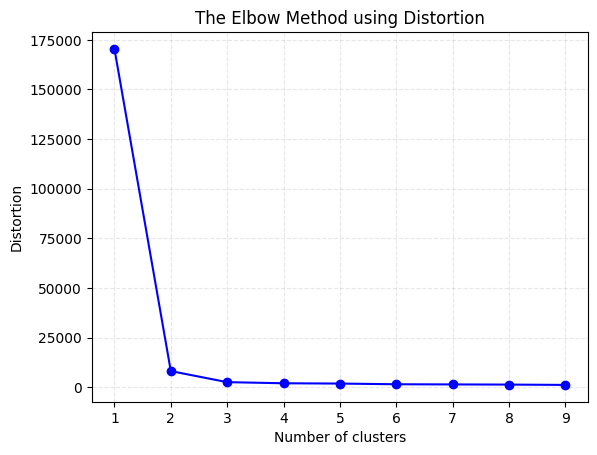

In [1005]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

Plotting Intertias

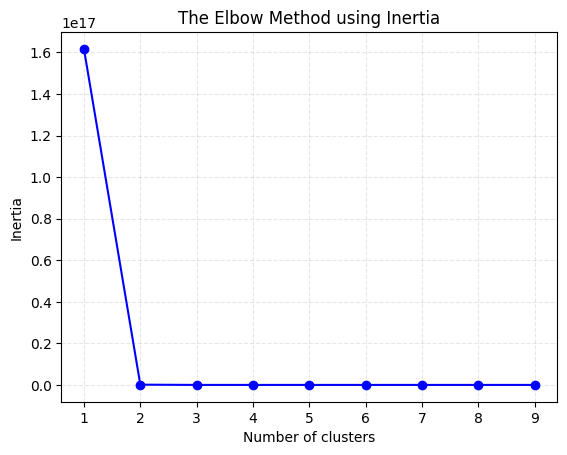

In [1006]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()